In [ ]:
def cli_prod_saldir_ag(df_):

  df = cli.loc[stato_abb, :].copy()
  df["Sales Director"] = df["Sales Director"].str.lower()
  df = df.merge(cli_merce, how="left", on="Cliente MERCE")\
    .merge(cod_prod, how="left", left_on="Codice ABBONAMENTO", right_on="Codice PRODOTTO")\
    .merge(sales_director, how="left", on="Sales Director")
#    .merge(agente_ordine.loc[:,['Codice agente', "Agente dell'ORDINE", 'RSM Agente']], how="left", left_on="Agente dell'Abbonamento", right_on="Codice agente")
    
  return df

clients = cli.pipe(cli_prod_saldir_ag)


def concat_prodotti(df_):
    df = clients.loc[:,["Solution", "Cliente MERCE"]].fillna("Senza attribuz.")
    df["Solution"] = pd.Categorical(df["Solution"], np.sort(df["Solution"].unique()))
    df.sort_values(by=["Solution"], inplace=True)
    df["Prodotti"] = df.groupby("Cliente MERCE")["Solution"].transform(lambda x: " + ".join(x)).apply(lambda x: remov_duplicates(x))
    return df["Prodotti"]

def pv_max(df_):
    df = clients.loc[:,["Cliente MERCE", "Valore PV New"]]
    df["Valore PV cliente"] = df.groupby("Cliente MERCE")["Valore PV New"].transform(sum)
    return df["Valore PV cliente"]


clients = clients.assign(Prodotti = lambda df_: df_.pipe(concat_prodotti)).assign(**{"Valore PV cliente": lambda df_: df_.pipe(pv_max)})
  

In [ ]:
clients['Cliente MERCE'] = clients['Cliente MERCE'].factorize()[0]

In [ ]:
from sklearn.preprocessing import RobustScaler

# Assumiamo che 'colonna_numerica' sia la tua colonna numerica
scaler = MinMaxScaler(feature_range=(0, 1))

clients[['Valore PV']] = scaler.fit_transform(clients[['Valore PV New']])

min_val = clients['Valore PV'].min()
if min_val < 0:
    clients['Valore PV'] = clients['Valore PV'] + abs(min_val)*1.5

#rumore = np.random.uniform(-0.5, 0.5, size=clients['Valore PV'].shape)
#clients['Valore PV'] = clients['Valore PV'] + rumore

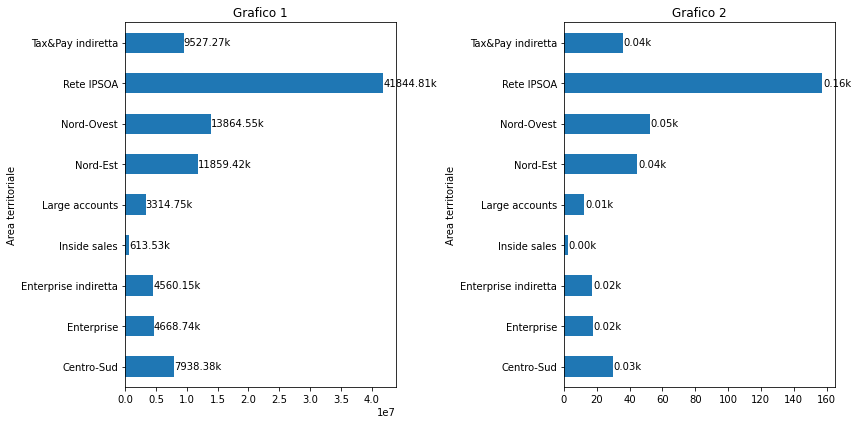

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calcola la somma di "Valore PV New" per ogni "Sales Director"
data = clients.groupby(["Area territoriale"])["Valore PV New"].sum()
data2 = clients.groupby(["Area territoriale"])["Valore PV"].sum()

# Crea una figura e una griglia di subplot con 1 riga e 2 colonne
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Crea un grafico a barre orizzontali sul primo subplot
data.plot(kind='barh', ax=axes[0])
axes[0].set_title('Grafico 1')
# Aggiungi etichette a ciascuna barra
for i in range(len(data)):
    axes[0].text(x = data[i]+0.5, y = i, s = f'{data[i]/1000:.2f}k', va = 'center')

# Crea un grafico a barre orizzontali sul secondo subplot
data2.plot(kind='barh', ax=axes[1])
axes[1].set_title('Grafico 2')
# Aggiungi etichette a ciascuna barra
for i in range(len(data2)):
    axes[1].text(x = data2[i]+0.5, y = i, s = f'{data2[i]/1000:.2f}k', va = 'center')

# Mostra il grafico
plt.tight_layout()  # Ajusta la posizione dei subplot per non avere sovrapposizioni
plt.show()


In [ ]:
clients.columns

Index(['Cliente MERCE', 'Canale di VENDITA', 'Cliente FATTURA', 'Sistema',
       'Numero SISTEMA', 'Stato Sintetico Contratto', 'Data inizio contratt',
       'Codice ABBONAMENTO', 'Tipo Abbonamento', 'Data Inizio Abb.',
       'Stato Esteso', 'Fornitura (SW)', 'Agente dell'Abbonamento',
       'Sales Director', 'Valore PV New', 'Tipo Licenza', 'Ultimo Agg.',
       'Segmento Aggregato Cl.Merce', 'Provincia', 'Regione',
       'Cliente Padre Merce', 'MDM', 'GTM BDG', 'Solution', 'Sub solution',
       'Codice PRODOTTO', 'Area territoriale', 'Rete', 'Prodotti',
       'Valore PV cliente', 'Valore PV'],
      dtype='object')

In [ ]:
clients[['Cliente MERCE', 'Canale di VENDITA', 'Stato Sintetico Contratto', 'Data inizio contratt',
       'Codice ABBONAMENTO', 'Tipo Abbonamento', 'Data Inizio Abb.',
       'Stato Esteso', 'Fornitura (SW)',
       'Segmento Aggregato Cl.Merce', 'MDM', 'GTM BDG', 'Solution', 'Sub solution',
       'Area territoriale', 'Rete', 'Valore PV']].to_csv(r"C:\Users\Raffaele.Sportiello\OneDrive - Wolters Kluwer\Documents\Analisi clienti\ai-lisi.csv", index=False)

In [ ]:
clients[["Data Inizio Abb.", "Valore PV New"]]

,Data Inizio Abb.,Valore PV New
0,2019-12-01,111.84
1,2019-12-01,439.39
2,2019-12-01,519.27
3,2003-03-01,694.80
4,2001-01-01,3347.23
...,...,...
435969,2011-09-01,14.62
435970,2011-09-01,43.32
435971,2011-09-01,0.00
435972,2011-09-01,0.00
